# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [8]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


In [9]:
# # I am using colab 
# from google.colab import drive
# drive.mount("/content/drive")

# # Mounted on MyDrive
# !ls "/content/drive"

# # Define your result path in the Mydrive --> avoids re-running the same network after session 

# # ROOT = ""./"
# # uncomment if you are using colab
# ROOT = "/content/drive/MyDrive/Machine Learning/Coursework/"

# ResultPath = ROOT + "Results"

# # make these directories if not available 
# # --> this will avoid you from downloading the data again and again
# os.makedirs(ROOT, exist_ok = True)
# os.makedirs(ResultPath, exist_ok = True)

In [10]:
# root_dir = "/content/drive/MyDrive/Machine Learning/Coursework/" # this is to be defined by you 
# local_path = "Data-for-students-regression/" # store the related data files in this folder

# # make these directories if not available 
# # --> this will avoid you from downloading the data again and again
# os.makedirs(root_dir, exist_ok = True)
# os.makedirs(local_path, exist_ok = True)

In [11]:
# data_dir = root_dir + local_path
# print(data_dir)

# ## Define paths to the training data and targets files
# training_data_path = data_dir + "Training_data.csv"
# training_targets_path = data_dir + "Training_data_targets.csv"

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

## Download training data

In [12]:
training_data = pd.read_csv(training_data_path)
training_data

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.000000,100,429.600000,80650,48904,7.5,0.000000,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,NaN,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,NaN,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,62.4,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,NaN,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965


In [13]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

## Download training data targets


In [14]:
training_data_targets = pd.read_csv(training_targets_path)
training_data_targets

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8
...,...
2433,201.5
2434,160.0
2435,160.0
2436,136.2


## Plot histograms of all features to visualise their distributions and identify outliers.

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>,
        <Axes: title={'center': 'povertyPercent'}>],
       [<Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>,
        <Axes: title={'center': 'PercentMarried'}>],
       [<Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>,
        <Axes: title={'center': 'PctBachDeg25_Over'}>],
       [<Axes: title={'center': 'PctEmployed16_Over'}>,
        <Axes: title={'ce

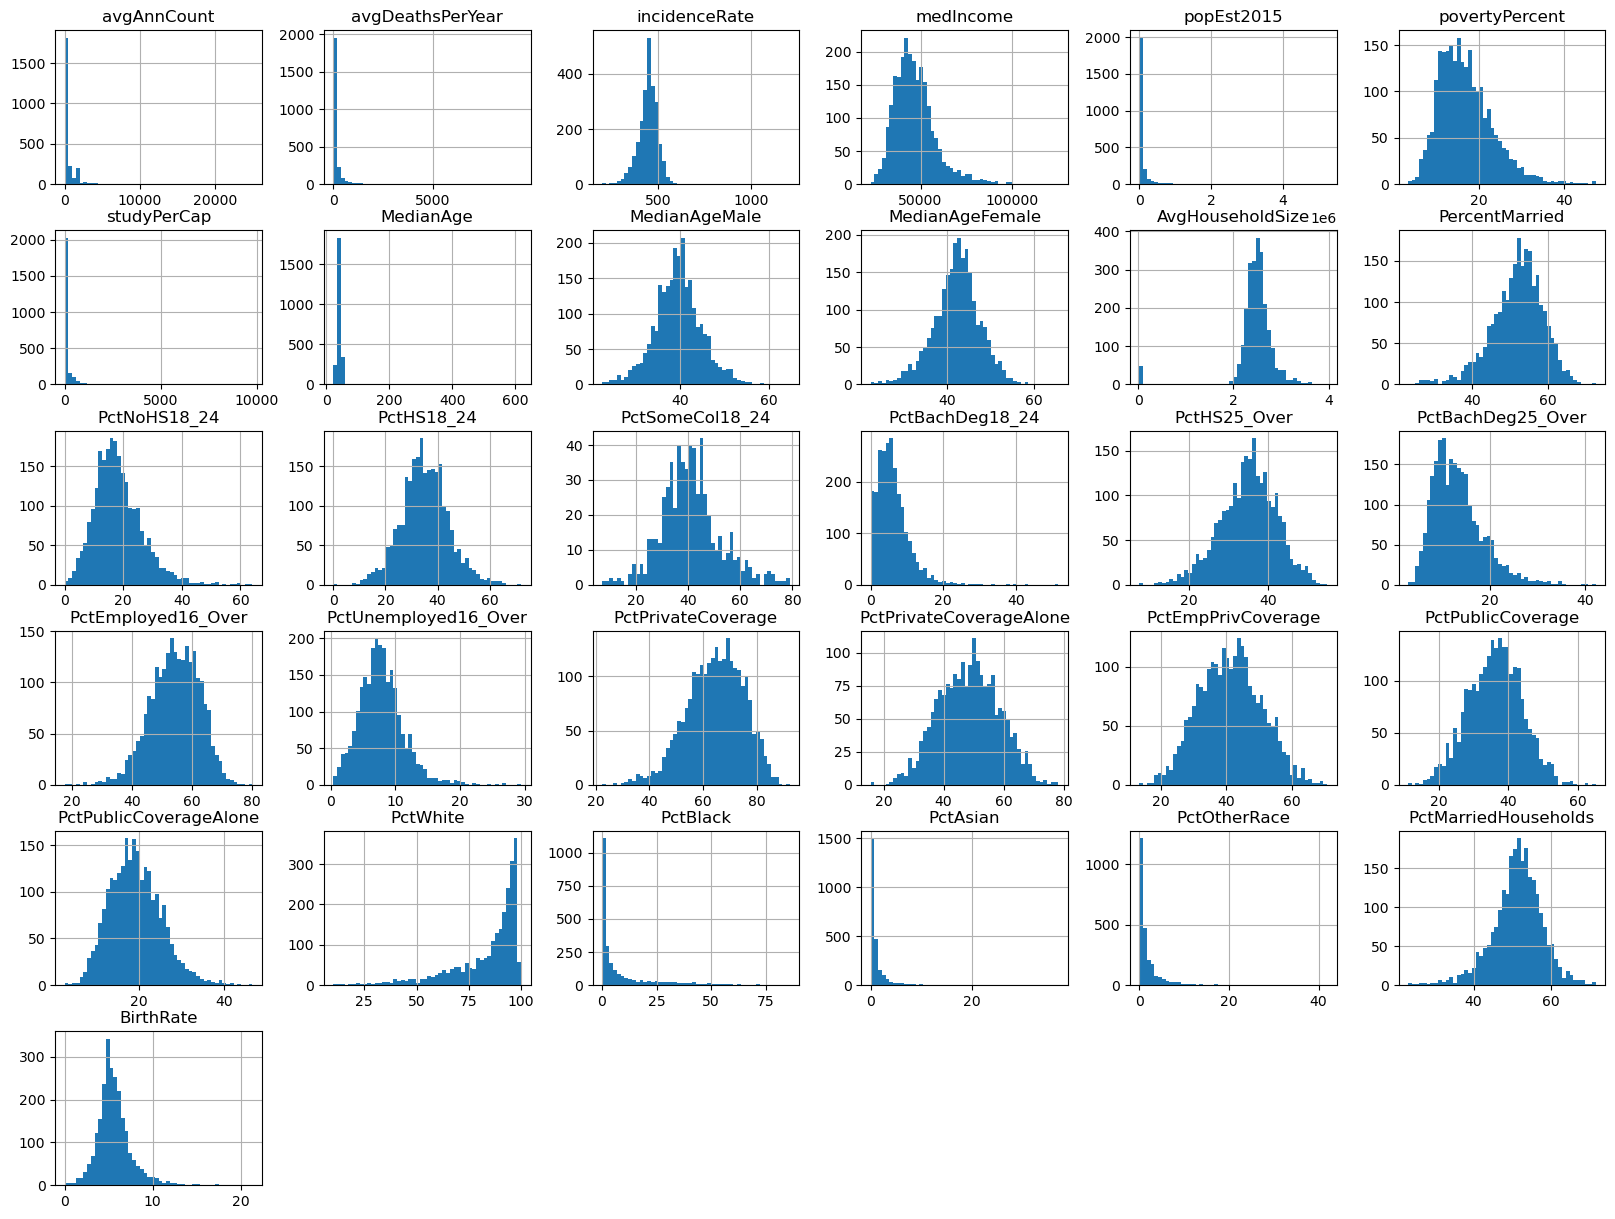

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

training_data.hist(bins=50,figsize=(20,15))

According to the histograms, most of the features are roughly normally distributed while some others are not. However, there are some features which are skewed such as PctBachDeg25_Over. In addition, we can identify an obvious outlier in some features: avgAnnCount, avgDeathsPerYear, incidenceRatepopEst2015, studyPerCap, MedianAge, PctBlack, PctAsian, and PctOtherRace.

Now we compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations from the strongest correlation to the weakest.

In [16]:
# Find correlation of all features with the target variable

corr = []
for i in range(training_data.shape[1]):
  corr.append(training_data.iloc[:, i].corr(training_data_targets["TARGET_deathRate"]))
corr

[-0.1500191674043368,
 -0.09404755907149374,
 0.44398325045239007,
 -0.416606804989592,
 -0.13012246061830512,
 0.41326005865421833,
 -0.024729016970627134,
 -3.8985731156604317e-05,
 -0.027262752431228984,
 0.008664665391756646,
 -0.04554533811106773,
 -0.26615294409212586,
 0.09056499653532299,
 0.26628478504560227,
 -0.18613994490057045,
 -0.28456615620732645,
 0.4099154744122088,
 -0.49141088348272244,
 -0.4003168080780501,
 0.3626123846209571,
 -0.38278606787668445,
 -0.35504981746698683,
 -0.2590060894954694,
 0.3918993715796028,
 0.4397339266743923,
 -0.17452114415320316,
 0.23638042232696993,
 -0.18194756801847342,
 -0.18260203285858256,
 -0.2906447675528536,
 -0.08854283555489137]

In [17]:
len(corr)

31

In [18]:
corr_test = corr # this will be used to rearrange the test dataset in the same order as the train dataset

In [19]:
corr_test

[-0.1500191674043368,
 -0.09404755907149374,
 0.44398325045239007,
 -0.416606804989592,
 -0.13012246061830512,
 0.41326005865421833,
 -0.024729016970627134,
 -3.8985731156604317e-05,
 -0.027262752431228984,
 0.008664665391756646,
 -0.04554533811106773,
 -0.26615294409212586,
 0.09056499653532299,
 0.26628478504560227,
 -0.18613994490057045,
 -0.28456615620732645,
 0.4099154744122088,
 -0.49141088348272244,
 -0.4003168080780501,
 0.3626123846209571,
 -0.38278606787668445,
 -0.35504981746698683,
 -0.2590060894954694,
 0.3918993715796028,
 0.4397339266743923,
 -0.17452114415320316,
 0.23638042232696993,
 -0.18194756801847342,
 -0.18260203285858256,
 -0.2906447675528536,
 -0.08854283555489137]

In [20]:
# Add row "corr" to the training data

training_data.loc["corr"] = corr
training_data

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.000000,30.000000,404.300000,33975.000000,8251.000000,20.50000,0.000000,51.300000,50.800000,51.900000,...,NaN,26.000000,49.700000,20.600000,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.000000,41.000000,403.800000,47363.000000,22702.000000,13.80000,0.000000,40.800000,39.800000,42.700000,...,56.50000,46.800000,31.600000,13.000000,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.000000,11.000000,352.000000,77222.000000,9899.000000,6.80000,0.000000,38.100000,36.900000,39.800000,...,65.40000,54.300000,18.200000,8.600000,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.000000,100.000000,429.600000,80650.000000,48904.000000,7.50000,0.000000,43.500000,42.700000,44.100000,...,64.20000,55.600000,28.800000,13.500000,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.000000,32.000000,407.500000,42839.000000,22255.000000,14.60000,0.000000,31.100000,30.200000,31.600000,...,50.70000,46.500000,26.800000,18.100000,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,113.000000,37.000000,497.300000,61259.000000,17299.000000,9.00000,0.000000,45.900000,44.900000,47.300000,...,NaN,43.600000,34.800000,19.900000,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666
2435,571.000000,210.000000,457.200000,49790.000000,118212.000000,12.60000,676.750245,35.400000,34.500000,36.300000,...,62.40000,56.500000,28.600000,13.700000,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288
2436,1962.667684,7.000000,453.549422,50886.000000,2640.000000,10.40000,0.000000,47.400000,45.300000,50.100000,...,NaN,35.100000,32.300000,12.600000,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965
2437,741.000000,308.000000,478.400000,45556.000000,119980.000000,13.80000,300.050008,44.000000,43.200000,44.600000,...,50.10000,44.800000,39.200000,18.900000,96.006176,0.790178,0.771187,0.406236,47.201757,4.823686


In [21]:
# Sort the columns by the correlations

training_data_sort = training_data.sort_values(by = "corr", axis = 1, ascending = False)
training_data_sort

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
0,404.300000,20.600000,20.50000,40.600000,49.700000,13.200000,27.900000,0.438181,37.100000,51.900000,...,NaN,26.000000,55.700000,2.600000,51.926207,NaN,57.400000,39.700000,33975.000000,6.700000
1,403.800000,13.000000,13.80000,35.300000,31.600000,3.600000,33.700000,2.102845,19.900000,42.700000,...,NaN,46.800000,51.100000,5.700000,50.949545,56.50000,75.200000,61.700000,47363.000000,19.300000
2,352.000000,8.600000,6.80000,35.200000,18.200000,5.400000,21.300000,0.000000,30.200000,39.800000,...,NaN,54.300000,62.100000,6.600000,64.532156,65.40000,76.100000,69.700000,77222.000000,17.000000
3,429.600000,13.500000,7.50000,29.900000,28.800000,5.300000,34.700000,7.407407,13.600000,44.100000,...,40.80000,55.600000,57.400000,10.900000,62.344481,64.20000,80.300000,65.000000,80650.000000,21.600000
4,407.500000,18.100000,14.60000,26.100000,26.800000,4.100000,29.700000,2.948701,31.000000,31.600000,...,NaN,46.500000,59.000000,1.400000,63.005948,50.70000,59.400000,67.400000,42839.000000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,497.300000,19.900000,9.00000,23.100000,34.800000,5.200000,25.200000,3.320038,6.700000,47.300000,...,NaN,43.600000,47.200000,22.500000,53.404362,NaN,70.500000,62.200000,61259.000000,25.100000
2435,457.200000,13.700000,12.60000,27.700000,28.600000,5.400000,26.700000,1.389174,5.300000,36.300000,...,NaN,56.500000,47.200000,8.400000,47.707412,62.40000,76.900000,65.100000,49790.000000,19.500000
2436,453.549422,12.600000,10.40000,37.700000,32.300000,1.900000,29.100000,0.987203,8.700000,50.100000,...,NaN,35.100000,69.100000,6.300000,62.436975,NaN,74.700000,62.600000,50886.000000,17.400000
2437,478.400000,18.900000,13.80000,35.600000,39.200000,7.700000,36.100000,0.790178,10.500000,44.600000,...,NaN,44.800000,49.600000,7.800000,47.201757,50.10000,67.600000,NaN,45556.000000,15.300000


In [22]:
training_data_sort = training_data_sort.drop(index = "corr")
training_data_sort

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
0,404.300000,20.6,20.5,40.6,49.7,13.2,27.9,0.438181,37.1,51.9,...,NaN,26.0,55.7,2.6,51.926207,NaN,57.4,39.7,33975.0,6.7
1,403.800000,13.0,13.8,35.3,31.6,3.6,33.7,2.102845,19.9,42.7,...,NaN,46.8,51.1,5.7,50.949545,56.5,75.2,61.7,47363.0,19.3
2,352.000000,8.6,6.8,35.2,18.2,5.4,21.3,0.000000,30.2,39.8,...,NaN,54.3,62.1,6.6,64.532156,65.4,76.1,69.7,77222.0,17.0
3,429.600000,13.5,7.5,29.9,28.8,5.3,34.7,7.407407,13.6,44.1,...,40.8,55.6,57.4,10.9,62.344481,64.2,80.3,65.0,80650.0,21.6
4,407.500000,18.1,14.6,26.1,26.8,4.1,29.7,2.948701,31.0,31.6,...,NaN,46.5,59.0,1.4,63.005948,50.7,59.4,67.4,42839.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,445.700000,23.4,17.5,43.1,42.6,8.0,41.8,2.154399,16.4,42.0,...,NaN,42.4,50.0,6.1,49.736708,NaN,62.6,49.6,41608.0,9.3
2434,497.300000,19.9,9.0,23.1,34.8,5.2,25.2,3.320038,6.7,47.3,...,NaN,43.6,47.2,22.5,53.404362,NaN,70.5,62.2,61259.0,25.1
2435,457.200000,13.7,12.6,27.7,28.6,5.4,26.7,1.389174,5.3,36.3,...,NaN,56.5,47.2,8.4,47.707412,62.4,76.9,65.1,49790.0,19.5
2436,453.549422,12.6,10.4,37.7,32.3,1.9,29.1,0.987203,8.7,50.1,...,NaN,35.1,69.1,6.3,62.436975,NaN,74.7,62.6,50886.0,17.4


Therefore, the top five features with strongest correlations to the targets are incidenceRate, PctPublicCoverageAlone, PovertyPercent, PctHS25_Over, and PctPublicCoverage.


Now we plot these correlations using the scatter matrix plotting function provided in pandas.

array([[<Axes: xlabel='incidenceRate', ylabel='incidenceRate'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <Axes: xlabel='povertyPercent', ylabel='incidenceRate'>,
        <Axes: xlabel='PctHS25_Over', ylabel='incidenceRate'>,
        <Axes: xlabel='PctPublicCoverage', ylabel='incidenceRate'>,
        <Axes: xlabel='PctUnemployed16_Over', ylabel='incidenceRate'>,
        <Axes: xlabel='PctHS18_24', ylabel='incidenceRate'>,
        <Axes: xlabel='PctBlack', ylabel='incidenceRate'>,
        <Axes: xlabel='PctNoHS18_24', ylabel='incidenceRate'>,
        <Axes: xlabel='MedianAgeFemale', ylabel='incidenceRate'>,
        <Axes: xlabel='MedianAge', ylabel='incidenceRate'>,
        <Axes: xlabel='studyPerCap', ylabel='incidenceRate'>,
        <Axes: xlabel='MedianAgeMale', ylabel='incidenceRate'>,
        <Axes: xlabel='AvgHouseholdSize', ylabel='incidenceRate'>,
        <Axes: xlabel='BirthRate', ylabel='incidenceRate'>,
        <Axes: xlabel='avgDeathsPe

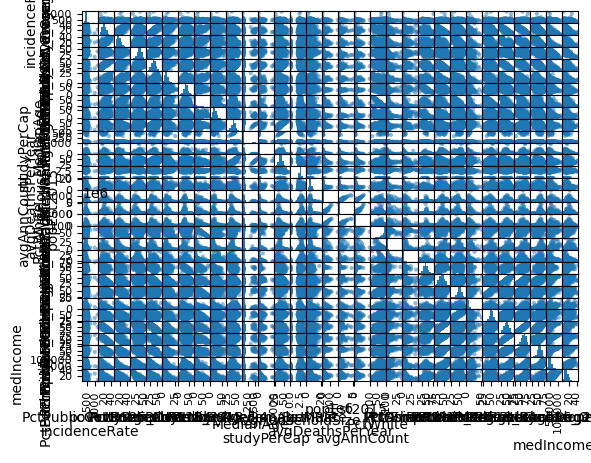

In [23]:
pd.plotting.scatter_matrix(training_data_sort)

Comment on at least two sets of features that show visible correlations to each other.

positive correlations: (9, 10), (12, 10), (15, 16), (15, 17), (16, 15), (16, 17) 

negative correlation: (13, 10)

In [24]:
pos = [[9, 10], [10, 12], [15, 16], [15, 17], [16, 17]]
neg = [[10, 13]]

pos_ass = []
for i in pos:
  pos_ass.append(list(training_data_sort.columns[i]))
print("Positive association:\n", pos_ass)

neg_ass = []
for j in neg:
  neg_ass.append(list(training_data_sort.columns[j]))
print("Negative association:\n", neg_ass)

Positive association:
 [['MedianAgeFemale', 'MedianAge'], ['MedianAge', 'MedianAgeMale'], ['avgDeathsPerYear', 'popEst2015'], ['avgDeathsPerYear', 'avgAnnCount'], ['popEst2015', 'avgAnnCount']]
Negative association:
 [['MedianAge', 'AvgHouseholdSize']]


The pairs of the features that seem to have correlation to each other with:

positive association: {(MedianAgeFemale, MedianAge), (MedianAge, MedianAgeMale), (avgDeathsPerYear, popEst2015), (avgDeathsPerYear, avgAnnCount), (popEst2015, avgAnnCount)}

negative association: {(MedianAge, AvgHouseholdSize)}

Having said that, it is difficult to look at the scatter plots and tell that which features are likely to have a high correlation to each other. Alternatively, we can find their correlations like this:

In [25]:
corr_acc = training_data.corr()
corr_acc

# sort the correlation matrix by absolute values
sorted_corr_acc = corr_acc.unstack().sort_values(ascending=False)

# filter out self-correlations and duplicates
sorted_corr_acc = sorted_corr_acc[sorted_corr_acc != 1].drop_duplicates()

# drop NaN
sorted_corr_acc = sorted_corr_acc.dropna()

# print the top 10 highest correlations
print(sorted_corr_acc.head(5))

avgDeathsPerYear         popEst2015                 0.974261
MedianAgeMale            MedianAgeFemale            0.935138
PctPrivateCoverage       PctPrivateCoverageAlone    0.933495
PctPrivateCoverageAlone  PctEmpPrivCoverage         0.928751
avgAnnCount              avgDeathsPerYear           0.925634
dtype: float64


Therefore, it can be seen that the top five pairs that have the highest correlations to each other are:

```
   Feature 1                  Feature 2               corr

avgDeathsPerYear         popEst2015                 0.974261
MedianAgeMale            MedianAgeFemale            0.935138
PctPrivateCoverage       PctPrivateCoverageAlone    0.933495
PctPrivateCoverageAlone  PctEmpPrivCoverage         0.928751
avgAnnCount              avgDeathsPerYear           0.925634

```

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

## Check if there is any null value in our training data

In [26]:
# Find cloumns having null values in the training data

index_null = []
for i in range(training_data_sort.shape[1]):
  if training_data_sort.iloc[:, i].isnull().any() == True:
    index_null.append(i)
print(index_null)

[21, 26, 28]


In [27]:
# Remove the rows that contain null values

df = training_data_sort.dropna()

In [28]:
df

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
3,429.6,13.5,7.5,29.9,28.8,5.3,34.7,7.407407,13.6,44.1,...,40.8,55.6,57.4,10.9,62.344481,64.2,80.3,65.0,80650.0,21.6
9,456.9,14.3,11.5,37.0,30.2,8.1,50.4,16.674513,14.8,44.4,...,32.1,46.1,55.1,2.7,58.258633,51.9,67.4,58.3,60121.0,13.0
15,423.1,26.1,20.4,26.2,35.7,12.6,33.6,8.549248,16.0,33.6,...,44.5,41.2,45.4,6.0,51.294510,46.6,54.4,52.3,51951.0,12.3
27,404.0,24.1,17.8,31.6,50.9,8.9,33.9,0.305159,27.3,52.5,...,36.5,25.9,52.7,2.2,48.967033,33.1,55.8,40.9,40189.0,11.3
36,512.4,20.8,16.7,39.2,40.7,7.1,36.4,0.849664,16.6,45.0,...,41.2,44.9,50.2,5.8,49.422127,48.8,66.0,53.6,46387.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,430.2,13.2,12.0,23.7,30.3,4.9,31.7,0.526340,13.6,42.4,...,49.4,50.6,51.7,5.3,49.231862,58.3,74.1,63.1,53572.0,24.3
2390,490.3,15.3,11.5,41.6,29.2,7.3,41.3,0.391914,14.7,41.8,...,39.0,53.1,56.5,4.9,59.069077,58.0,72.2,59.5,54849.0,10.2
2399,479.6,15.8,10.2,35.8,33.7,4.2,39.6,0.831176,16.5,42.8,...,34.1,45.4,58.3,9.8,55.001119,54.4,71.7,65.9,56243.0,14.0
2424,442.0,25.4,21.8,40.8,43.4,8.7,41.5,4.091759,25.1,42.7,...,31.8,28.7,52.4,1.6,52.111069,33.6,47.3,42.3,35910.0,9.6


Hence, there are the rows containing null values 2,438 - 471 = 1,967 rows which is around 80% of the entire training data.

In [29]:
# Find rows having null values in the training data target

index_targets_null = []
for i in range(training_data_targets.shape[1]):
  if training_data_targets.iloc[:, i].isnull().any() == True:
    index_targets_null.append(i)
print(index_targets_null)

[]


So there is no any null value in the training data targets.

We can see that there are so many rows containing null values in the training data. However, we are going to keep those rows to train our models, or otherwise there will not be enough data to train the models.

## Split the dataset
Now we have to split the training data to be a training set and test set. The training set will be used to train and validate to model, and the test set will be used to test how good the model will be before predicting the real test dataset. In addition, we replace the null values by zeros before training the models because they cannot compute the null values.

In [30]:
# Concatenate the training data and training data targets

## redefine df (no removing null values)

df = training_data_sort
df["TARGET_deathRate"] = training_data_targets

## replace NaN values by zeros
df = df.fillna(0)

df

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over,TARGET_deathRate
0,404.300000,20.6,20.5,40.6,49.7,13.2,27.9,0.438181,37.1,51.9,...,26.0,55.7,2.6,51.926207,0.0,57.4,39.7,33975.0,6.7,199.5
1,403.800000,13.0,13.8,35.3,31.6,3.6,33.7,2.102845,19.9,42.7,...,46.8,51.1,5.7,50.949545,56.5,75.2,61.7,47363.0,19.3,137.1
2,352.000000,8.6,6.8,35.2,18.2,5.4,21.3,0.000000,30.2,39.8,...,54.3,62.1,6.6,64.532156,65.4,76.1,69.7,77222.0,17.0,126.9
3,429.600000,13.5,7.5,29.9,28.8,5.3,34.7,7.407407,13.6,44.1,...,55.6,57.4,10.9,62.344481,64.2,80.3,65.0,80650.0,21.6,173.8
4,407.500000,18.1,14.6,26.1,26.8,4.1,29.7,2.948701,31.0,31.6,...,46.5,59.0,1.4,63.005948,50.7,59.4,67.4,42839.0,9.5,179.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,445.700000,23.4,17.5,43.1,42.6,8.0,41.8,2.154399,16.4,42.0,...,42.4,50.0,6.1,49.736708,0.0,62.6,49.6,41608.0,9.3,201.5
2434,497.300000,19.9,9.0,23.1,34.8,5.2,25.2,3.320038,6.7,47.3,...,43.6,47.2,22.5,53.404362,0.0,70.5,62.2,61259.0,25.1,160.0
2435,457.200000,13.7,12.6,27.7,28.6,5.4,26.7,1.389174,5.3,36.3,...,56.5,47.2,8.4,47.707412,62.4,76.9,65.1,49790.0,19.5,160.0
2436,453.549422,12.6,10.4,37.7,32.3,1.9,29.1,0.987203,8.7,50.1,...,35.1,69.1,6.3,62.436975,0.0,74.7,62.6,50886.0,17.4,136.2


In [31]:
# Split the dataframe into the training set and test set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state=42)

In [32]:
train_set

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over,TARGET_deathRate
2032,446.100000,14.3,10.6,36.5,30.3,5.5,33.8,0.828739,8.2,39.8,...,55.7,53.8,7.5,54.734212,61.6,77.2,65.9,56365.0,15.6,164.0
2255,434.400000,22.7,20.7,37.6,39.2,4.9,55.8,31.478925,5.4,45.9,...,36.2,44.5,3.3,46.157104,43.1,56.2,52.7,36339.0,9.2,182.2
651,471.400000,16.5,14.5,28.9,31.1,5.9,28.5,0.507475,16.3,35.4,...,40.0,55.7,1.3,55.384774,49.1,65.0,60.2,44236.0,12.0,165.4
406,385.100000,20.6,22.5,30.2,37.9,16.5,20.3,1.259782,31.5,44.1,...,30.7,48.4,0.0,55.450237,35.1,48.4,44.5,36929.0,9.3,202.2
177,439.500000,21.4,19.0,39.9,41.7,9.1,38.5,1.494788,17.2,43.3,...,35.2,53.7,4.6,50.153591,0.0,58.0,51.1,38329.0,8.9,206.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,420.000000,14.2,8.5,15.2,24.8,7.7,25.8,2.585982,10.6,37.8,...,57.3,53.2,16.8,56.303111,0.0,74.1,61.9,97219.0,26.1,135.0
1095,330.700000,24.3,26.5,30.1,43.9,2.8,46.7,0.513950,33.0,47.0,...,37.4,50.7,5.8,61.131611,41.0,58.6,27.8,40837.0,8.2,156.8
1130,475.400000,20.6,25.0,23.0,33.0,10.0,22.1,48.620020,10.7,33.7,...,39.0,26.2,13.0,23.885628,0.0,59.3,58.8,42074.0,21.9,200.2
1294,453.549422,8.0,6.6,15.2,18.9,4.5,25.0,4.488774,11.5,38.1,...,63.0,56.8,17.1,55.461351,0.0,84.0,69.2,76104.0,33.6,146.8


In [33]:
test_set

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over,TARGET_deathRate
443,456.800000,25.8,21.7,43.6,45.0,13.9,37.2,3.150579,23.9,45.9,...,30.1,51.2,1.2,52.912572,38.6,53.6,44.5,36285.0,7.6,185.9
2075,425.100000,30.3,23.2,36.6,49.3,12.7,44.4,42.180685,23.5,47.9,...,29.0,44.8,1.7,44.774323,33.7,46.1,44.0,30668.0,7.4,171.8
1366,453.549422,12.9,10.3,24.7,35.8,8.5,38.6,0.554392,17.3,50.0,...,39.6,58.9,5.0,56.135295,48.9,70.7,51.5,60322.0,16.4,145.2
259,339.400000,17.7,13.6,37.1,39.5,3.5,35.8,0.128824,6.9,50.8,...,30.9,64.0,3.4,58.339248,47.6,70.8,60.9,44794.0,14.6,119.2
2164,315.200000,10.6,4.9,27.7,23.0,4.6,31.7,0.735038,14.1,37.9,...,62.7,59.5,14.0,60.155889,0.0,81.8,69.6,75920.0,22.8,163.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,453.549422,12.8,12.0,32.7,38.8,2.4,21.9,3.085229,19.2,51.9,...,37.2,60.8,17.9,53.288926,46.7,77.0,59.6,45341.0,20.0,134.0
2432,502.700000,24.1,17.7,36.7,39.5,7.2,28.8,5.018399,15.7,41.0,...,42.0,53.9,4.1,53.745657,0.0,61.5,53.8,39247.0,10.5,201.1
2078,382.000000,16.7,19.5,36.4,34.1,3.4,36.7,0.000000,52.4,43.9,...,29.2,57.7,0.0,53.898305,47.4,63.4,54.4,35875.0,14.0,149.4
383,381.000000,29.9,27.9,22.0,43.5,11.5,21.3,1.730206,14.0,34.0,...,32.0,46.2,4.8,48.156818,37.3,49.6,54.0,38974.0,16.2,150.8


Split the dataset into:

**x_train** which contains all the features for training the models,

**y_train** which contains the targets for training the models,

**x_test** which contains all the features for testing the models,

**y_test** which contains the targets for testing the models

for convenience.

In [34]:
x_train, y_train = train_set.iloc[:, 0:31], train_set.iloc[:, -1:]
x_test, y_test = test_set.iloc[:, 0:31], test_set.iloc[:, -1:]

In [35]:
x_train

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
2032,446.100000,14.3,10.6,36.5,30.3,5.5,33.8,0.828739,8.2,39.8,...,50.5,55.7,53.8,7.5,54.734212,61.6,77.2,65.9,56365.0,15.6
2255,434.400000,22.7,20.7,37.6,39.2,4.9,55.8,31.478925,5.4,45.9,...,0.0,36.2,44.5,3.3,46.157104,43.1,56.2,52.7,36339.0,9.2
651,471.400000,16.5,14.5,28.9,31.1,5.9,28.5,0.507475,16.3,35.4,...,53.9,40.0,55.7,1.3,55.384774,49.1,65.0,60.2,44236.0,12.0
406,385.100000,20.6,22.5,30.2,37.9,16.5,20.3,1.259782,31.5,44.1,...,0.0,30.7,48.4,0.0,55.450237,35.1,48.4,44.5,36929.0,9.3
177,439.500000,21.4,19.0,39.9,41.7,9.1,38.5,1.494788,17.2,43.3,...,0.0,35.2,53.7,4.6,50.153591,0.0,58.0,51.1,38329.0,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,420.000000,14.2,8.5,15.2,24.8,7.7,25.8,2.585982,10.6,37.8,...,0.0,57.3,53.2,16.8,56.303111,0.0,74.1,61.9,97219.0,26.1
1095,330.700000,24.3,26.5,30.1,43.9,2.8,46.7,0.513950,33.0,47.0,...,0.0,37.4,50.7,5.8,61.131611,41.0,58.6,27.8,40837.0,8.2
1130,475.400000,20.6,25.0,23.0,33.0,10.0,22.1,48.620020,10.7,33.7,...,0.0,39.0,26.2,13.0,23.885628,0.0,59.3,58.8,42074.0,21.9
1294,453.549422,8.0,6.6,15.2,18.9,4.5,25.0,4.488774,11.5,38.1,...,0.0,63.0,56.8,17.1,55.461351,0.0,84.0,69.2,76104.0,33.6


In [36]:
y_train

,TARGET_deathRate
2032,164.0
2255,182.2
651,165.4
406,202.2
177,206.6
...,...
1638,135.0
1095,156.8
1130,200.2
1294,146.8


In [37]:
x_test

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
443,456.800000,25.8,21.7,43.6,45.0,13.9,37.2,3.150579,23.9,45.9,...,37.7,30.1,51.2,1.2,52.912572,38.6,53.6,44.5,36285.0,7.6
2075,425.100000,30.3,23.2,36.6,49.3,12.7,44.4,42.180685,23.5,47.9,...,30.3,29.0,44.8,1.7,44.774323,33.7,46.1,44.0,30668.0,7.4
1366,453.549422,12.9,10.3,24.7,35.8,8.5,38.6,0.554392,17.3,50.0,...,0.0,39.6,58.9,5.0,56.135295,48.9,70.7,51.5,60322.0,16.4
259,339.400000,17.7,13.6,37.1,39.5,3.5,35.8,0.128824,6.9,50.8,...,0.0,30.9,64.0,3.4,58.339248,47.6,70.8,60.9,44794.0,14.6
2164,315.200000,10.6,4.9,27.7,23.0,4.6,31.7,0.735038,14.1,37.9,...,0.0,62.7,59.5,14.0,60.155889,0.0,81.8,69.6,75920.0,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,453.549422,12.8,12.0,32.7,38.8,2.4,21.9,3.085229,19.2,51.9,...,0.0,37.2,60.8,17.9,53.288926,46.7,77.0,59.6,45341.0,20.0
2432,502.700000,24.1,17.7,36.7,39.5,7.2,28.8,5.018399,15.7,41.0,...,0.0,42.0,53.9,4.1,53.745657,0.0,61.5,53.8,39247.0,10.5
2078,382.000000,16.7,19.5,36.4,34.1,3.4,36.7,0.000000,52.4,43.9,...,0.0,29.2,57.7,0.0,53.898305,47.4,63.4,54.4,35875.0,14.0
383,381.000000,29.9,27.9,22.0,43.5,11.5,21.3,1.730206,14.0,34.0,...,0.0,32.0,46.2,4.8,48.156818,37.3,49.6,54.0,38974.0,16.2


In [38]:
y_test

,TARGET_deathRate
443,185.9
2075,171.8
1366,145.2
259,119.2
2164,163.8
...,...
307,134.0
2432,201.1
2078,149.4
383,150.8


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from math import sqrt

## Ordinary least squares (OLS)

In [40]:
# create a regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [41]:
# fit the model

lin_reg.fit(x_train, y_train)

LinearRegression()

In [42]:
# make predictions

predictions = lin_reg.predict(x_test)

In [43]:
# see some predictions comparing with the actual targets

print("Predictions:", predictions[0:5])
print("Labels:", y_test[0:5])

Predictions: [[195.15038665]
 [198.12573625]
 [155.97114168]
 [146.27959977]
 [128.30757198]]
Labels:       TARGET_deathRate
443              185.9
2075             171.8
1366             145.2
259              119.2
2164             163.8


In [44]:
# compute RMSE

lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE = ", lin_rmse)

RMSE =  18.788260840356163


## Lasso model

In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).
The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

In [45]:
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [46]:
pred_lasso = model_lasso.predict(x_test)

In [47]:
# see some predictions comparing with the actual targets

print("Predictions:", pred_lasso[0:5])
print("Labels:", y_test[0:5])

Predictions: [195.14232018 198.11526367 155.99035841 146.27076112 128.31175743]
Labels:       TARGET_deathRate
443              185.9
2075             171.8
1366             145.2
259              119.2
2164             163.8


In [48]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, pred_lasso))
print("Lasso RMSE = ", lasso_rmse)

Lasso RMSE =  18.789209812182474


## Ridge model

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

In [49]:
model_ridge = Ridge(alpha = 0.01)
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [50]:
pred_ridge = model_ridge.predict(x_test)

In [51]:
# see some predictions comparing with the actual targets

print("Predictions:", pred_ridge[0:5])
print("Labels:", y_test[0:5])

Predictions: [[195.15038832]
 [198.12573044]
 [155.97114263]
 [146.27960262]
 [128.3075711 ]]
Labels:       TARGET_deathRate
443              185.9
2075             171.8
1366             145.2
259              119.2
2164             163.8


In [52]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, pred_ridge))
print("Ridge RMSE = ", ridge_rmse)

Ridge RMSE =  18.788260592611536


In [53]:
rmse = {"OLS" : lin_rmse, "Lasso" : lasso_rmse, "Ridge" : ridge_rmse}
rmse

{'OLS': 18.788260840356163,
 'Lasso': 18.789209812182474,
 'Ridge': 18.788260592611536}

We can see that all three models have similar RMSE to each other.

In [54]:
best_model = min(rmse, key = rmse.get)
print(best_model)

Ridge


However, based on those fitting, the best model (lowest RMSE) is the Ridge model.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [55]:
model_lasso.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [56]:
# get coefficients and bias values

print("coefficients: ", model_lasso.coef_)
print("bias: ", model_lasso.intercept_)

coefficients:  [ 1.90041798e-01  2.67009294e-01  3.66588362e-01  2.95535254e-01
 -1.54056145e-01  1.70965260e-01  2.25628353e-01 -1.39795398e-01
 -1.25824749e-01  1.42142930e-01 -5.01323057e-03  3.85947195e-04
 -6.44153917e-01 -1.03030957e-01 -1.09332561e+00  2.09160177e-02
 -1.72596977e-05 -4.10980180e-03 -1.47268704e-01  1.29136608e-01
 -1.00881953e+00 -2.44527215e-02  2.44254345e-01  7.99439134e-01
  0.00000000e+00 -8.68433721e-01  3.73055214e-03 -5.35264149e-01
 -6.34871892e-02  7.75140751e-05 -1.55677131e+00]
bias:  [160.21544411]


In [57]:
# get index that have top five strongest features

import heapq

imp_features = heapq.nlargest(5, range(len(model_lasso.coef_)), model_lasso.coef_.take)
imp_features

[23, 2, 3, 1, 22]

In [58]:
model_lasso.coef_[imp_features]

array([0.79943913, 0.36658836, 0.29553525, 0.26700929, 0.24425435])

In [59]:
# get columns names that have the top five strongest features

print("The five most important/relevant features are ", list(x_train.columns[imp_features]))

The five most important/relevant features are  ['PercentMarried', 'povertyPercent', 'PctHS25_Over', 'PctPublicCoverageAlone', 'PctEmpPrivCoverage']


Therefore, based on the Lasso model, the five most important feature, from the most important to the fifth most important, are **PercentMarried, povertyPercent, PctH25_Over, PctPublicCoverAlone, and PctEmpPrivCoverage**. Surprisingly, the feature PercentMarried is the most important feature which is more than twice as important as the other four.

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

In [61]:
forest_reg.fit(x_train, y_train)

/var/folders/_9/4cbg6mnd3fjg8bf_d_k3ksqc0000gn/T/ipykernel_84005/3756229084.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(x_train, y_train)


RandomForestRegressor()

In [62]:
forest_pred = forest_reg.predict(x_test)

In [63]:
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
print("Randon Forest RMSE = ", forest_rmse)

Randon Forest RMSE =  19.564238059489075


In [64]:
rmse["Random Forest"] = forest_rmse
rmse

{'OLS': 18.788260840356163,
 'Lasso': 18.789209812182474,
 'Ridge': 18.788260592611536,
 'Random Forest': 19.564238059489075}

In [65]:
new_best_model = min(rmse, key = rmse.get)
new_best_model

'Ridge'

In [66]:
diff = (rmse["Random Forest"] - rmse[best_model])/rmse[best_model]
if diff > 0:
  print("The Random Forest mode RMSE is worse than that of the best model in the Example 3,", best_model + ", by", diff*100, "%")
elif diff < 0:
  print("The Random Forest mode RMSE is better than that of the best model in the Example 3,", best_model + ", by", diff*100, "%")
else:
  print("The Random Forest mode RMSE is equal to that of the best model in the Example 3,", best_model)

The Random Forest mode RMSE is worse than that of the best model in the Example 3, Ridge, by 4.130118714569516 %


In [67]:
# best model in the four models

print("The best model in the four models is", new_best_model)

The best model in the four models is Ridge


In the four models, the best model (least RMSE) is still the Ridge model based on these experiments.

Let's try Cross Validation (10-fold)

In [68]:
from sklearn.model_selection import cross_val_score

cv_forest_reg = RandomForestRegressor()

cv_forest_reg.fit(x_train, y_train)

# Perform 10-fold cross-validation
cv_forest_reg_scores = cross_val_score(cv_forest_reg, x_train, y_train, scoring = "neg_mean_squared_error", cv = 10)

cv_forest_rmse_scores = np.sqrt(-cv_forest_reg_scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean Accuracy:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(cv_forest_rmse_scores)

/var/folders/_9/4cbg6mnd3fjg8bf_d_k3ksqc0000gn/T/ipykernel_84005/876651146.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cv_forest_reg.fit(x_train, y_train)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConvers

Scores: [18.29569642 19.4876384  20.25900522 16.68416305 18.0788587  19.78857245
 19.59939003 18.3164109  19.20275288 18.51254736]
Mean Accuracy: 18.822503542838394
Standard deviation: 0.9971263113877686


In [69]:
pred_cv_forest_reg = cv_forest_reg.predict(x_test)

cv_forest_reg_mse = mean_squared_error(y_test, pred_cv_forest_reg)
cv_forest_reg_rmse = np.sqrt(cv_forest_reg_mse)
print("10-Fold Cross Validation Randon Forest RMSE =", cv_forest_reg_rmse)

10-Fold Cross Validation Randon Forest RMSE = 19.512793006380097


It can be seen that the mean of the RMSE of the Random Forest model is slightly better when applying 10-fold cross validation. That means applying the 10-fold cross validation would help get the better model. However, it is only a slight difference. Hence, we do not apply the k-fold cross validation due to the implement time. In conclusion, the Ridge model perform the best based on those experiments.

Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression?

In [70]:
# get coefficients and bias values

forest_coeff = forest_reg.feature_importances_
print("coefficients: ", forest_coeff)
len(forest_coeff)

coefficients:  [0.20068345 0.02937592 0.02419295 0.04657259 0.01293649 0.02327556
 0.0223389  0.02083207 0.01595583 0.01385701 0.01060235 0.00401552
 0.01100175 0.0181462  0.0166198  0.03986625 0.01932443 0.01740264
 0.01695641 0.01937043 0.02497452 0.00413525 0.01219791 0.0166328
 0.01711471 0.02280105 0.00858608 0.02443375 0.02730207 0.0462292
 0.21226612]


31

In [71]:
# get index that have top five strongest features

import heapq

forest_imp_features = heapq.nlargest(5, range(len(forest_coeff)), forest_coeff.take)
forest_imp_features

[30, 0, 3, 29, 15]

In [72]:
forest_coeff[forest_imp_features]

array([0.21226612, 0.20068345, 0.04657259, 0.0462292 , 0.03986625])

In [73]:
# get columns names that have the top five strongest features

print("The five most important/relevant features are ", list(x_train.columns[forest_imp_features]))

The five most important/relevant features are  ['PctBachDeg25_Over', 'incidenceRate', 'PctHS25_Over', 'medIncome', 'avgDeathsPerYear']


Therefore, based on the Random Forest model, the five most important feature, from the most important to the fifth most important, are **PctBachDeg25_Over, incidenceRate, medIncome, PctH25_Over, and avgDeathsPerYear**.

In [74]:
print("Lasso:")
list(x_train.columns[imp_features])

Lasso:


['PercentMarried',
 'povertyPercent',
 'PctHS25_Over',
 'PctPublicCoverageAlone',
 'PctEmpPrivCoverage']

In [75]:
print("Random Forest:")
list(x_train.columns[forest_imp_features])

Random Forest:


['PctBachDeg25_Over',
 'incidenceRate',
 'PctHS25_Over',
 'medIncome',
 'avgDeathsPerYear']

In [76]:
print("The common features are", set(list(x_train.columns[forest_imp_features])).intersection(list(x_train.columns[imp_features])))

The common features are {'PctHS25_Over'}


To compare the Random Forest model with the Lasso model, we can see that the most important feature based the Random Forest model is PctBachDeg25_Over while the Lasso model tells that it is PercentMarried. However, there is a common feature between the two models which is PctH25_Over. This feature is the third most important feature in both models.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [77]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [78]:
test_data

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,173.000000,80,409.900000,44076,36223,20.3,0.000000,39.2,38.0,40.0,...,NaN,34.5,35.0,19.9,84.954412,6.834058,0.709777,5.271427,56.565961,7.914411
1,777.000000,291,475.200000,49061,150346,12.9,525.454618,39.4,37.6,41.3,...,51.8,41.5,31.6,14.9,94.374888,0.364712,0.878342,0.375053,54.146506,7.001795
2,38150.000000,14010,405.500000,55686,10170292,18.7,255.941521,35.6,34.4,36.8,...,47.4,39.7,32.9,23.0,53.258710,8.276140,14.129380,19.591522,44.581650,4.705281
3,102.000000,51,442.500000,34916,16779,23.0,59.598307,41.1,38.9,42.9,...,35.5,30.9,47.1,27.7,97.298726,0.898467,0.076340,0.035234,47.864397,5.841924
4,108.000000,41,364.100000,72510,41764,9.8,0.000000,33.3,32.2,34.1,...,58.4,51.6,19.3,10.8,71.433130,14.257664,5.242618,4.440027,56.913054,6.934168
5,187.000000,80,521.200000,40766,28487,20.6,0.000000,43.1,41.6,44.6,...,47.5,42.5,38.5,20.9,93.538472,1.519113,0.374479,0.162510,52.138829,2.198163
6,95.000000,37,444.500000,52273,14915,9.9,0.000000,43.5,41.7,45.1,...,NaN,53.3,31.3,13.0,98.236002,0.394227,0.467727,0.000000,60.318995,4.203691
7,98.000000,34,461.200000,50370,17094,11.6,234.000234,38.0,37.4,38.9,...,49.9,40.6,36.4,18.3,91.525620,1.211454,0.313007,3.570601,56.553895,8.150028
8,193.000000,73,468.200000,48718,31330,15.9,31.918289,43.3,42.7,44.2,...,52.5,48.0,38.4,18.6,95.979695,1.416351,0.764579,0.394823,49.625272,3.499365
9,113.000000,47,408.900000,31176,22881,32.5,0.000000,38.4,35.6,40.3,...,35.3,30.5,44.5,29.3,53.890366,43.162906,1.162392,0.403191,45.871348,5.115327


First, we rearrange the columns of the test_data to be the same order as the columns of the train dataset.

In [79]:
corr_test

[-0.1500191674043368,
 -0.09404755907149374,
 0.44398325045239007,
 -0.416606804989592,
 -0.13012246061830512,
 0.41326005865421833,
 -0.024729016970627134,
 -3.8985731156604317e-05,
 -0.027262752431228984,
 0.008664665391756646,
 -0.04554533811106773,
 -0.26615294409212586,
 0.09056499653532299,
 0.26628478504560227,
 -0.18613994490057045,
 -0.28456615620732645,
 0.4099154744122088,
 -0.49141088348272244,
 -0.4003168080780501,
 0.3626123846209571,
 -0.38278606787668445,
 -0.35504981746698683,
 -0.2590060894954694,
 0.3918993715796028,
 0.4397339266743923,
 -0.17452114415320316,
 0.23638042232696993,
 -0.18194756801847342,
 -0.18260203285858256,
 -0.2906447675528536,
 -0.08854283555489137]

In [80]:
test_data.loc["corr"] = corr_test
test_data_sort = test_data.sort_values(by = "corr", axis = 1, ascending = False)
test_data_sort = test_data_sort.drop(index = "corr")

## replace NaN values by zeros
test_data_sort = test_data_sort.fillna(0)

test_data_sort

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
0,409.900000,19.9,20.3,37.3,35.0,7.1,41.1,6.834058,13.0,40.0,...,0.0,34.5,57.4,2.8,56.565961,0.0,55.2,55.3,44076.0,10.5
1,475.200000,14.9,12.9,28.4,31.6,7.9,36.8,0.364712,16.0,41.3,...,0.0,41.5,55.3,4.8,54.146506,51.8,67.8,57.0,49061.0,15.7
2,405.500000,23.0,18.7,20.7,32.9,10.0,27.0,8.276140,15.3,36.8,...,47.9,39.7,42.4,9.9,44.581650,47.4,55.0,58.0,55686.0,19.8
3,442.500000,27.7,23.0,42.7,47.1,6.9,26.0,0.898467,14.1,42.9,...,0.0,30.9,48.9,4.0,47.864397,35.5,50.9,47.9,34916.0,8.3
4,364.100000,10.8,9.8,26.0,19.3,7.5,25.2,14.257664,21.6,34.1,...,0.0,51.6,53.3,8.0,56.913054,58.4,69.1,69.8,72510.0,17.6
5,521.200000,20.9,20.6,37.2,38.5,6.7,41.8,1.519113,17.6,44.6,...,0.0,42.5,53.9,6.6,52.138829,47.5,61.7,51.7,40766.0,9.2
6,444.500000,13.0,9.9,40.8,31.3,4.0,43.7,0.394227,11.5,45.1,...,0.0,53.3,63.6,6.4,60.318995,0.0,79.6,0.0,52273.0,11.1
7,461.200000,18.3,11.6,35.8,36.4,4.8,30.1,1.211454,24.0,38.9,...,0.0,40.6,56.4,8.3,56.553895,49.9,67.8,62.0,50370.0,10.6
8,468.200000,18.6,15.9,38.5,38.4,10.5,33.8,1.416351,9.1,44.2,...,0.0,48.0,48.6,7.1,49.625272,52.5,71.1,53.0,48718.0,11.2
9,408.900000,29.3,32.5,35.7,44.5,15.5,29.4,43.162906,27.6,40.3,...,0.0,30.5,45.3,1.6,45.871348,35.3,46.7,47.7,31176.0,8.9


In [81]:
test_targets

,TARGET_deathRate
0,181.2
1,173.4
2,148.4
3,213.5
4,155.2
5,220.2
6,156.6
7,148.6
8,172.8
9,164.9


Since the best model so far is the Ridge model, we are going to apply the Ridge model to predict the unseen data.

In [82]:
# split the entire train dataset into whole_x_train (all features) and whole_y_train (targets)

whole_x_train, whole_y_train = df.iloc[:, 0:31], df.iloc[:, -1:]

In [83]:
whole_x_train

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctHS25_Over,PctPublicCoverage,PctUnemployed16_Over,PctHS18_24,PctBlack,PctNoHS18_24,MedianAgeFemale,...,PctSomeCol18_24,PctEmpPrivCoverage,PercentMarried,PctBachDeg18_24,PctMarriedHouseholds,PctPrivateCoverageAlone,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
0,404.300000,20.6,20.5,40.6,49.7,13.2,27.9,0.438181,37.1,51.9,...,0.0,26.0,55.7,2.6,51.926207,0.0,57.4,39.7,33975.0,6.7
1,403.800000,13.0,13.8,35.3,31.6,3.6,33.7,2.102845,19.9,42.7,...,0.0,46.8,51.1,5.7,50.949545,56.5,75.2,61.7,47363.0,19.3
2,352.000000,8.6,6.8,35.2,18.2,5.4,21.3,0.000000,30.2,39.8,...,0.0,54.3,62.1,6.6,64.532156,65.4,76.1,69.7,77222.0,17.0
3,429.600000,13.5,7.5,29.9,28.8,5.3,34.7,7.407407,13.6,44.1,...,40.8,55.6,57.4,10.9,62.344481,64.2,80.3,65.0,80650.0,21.6
4,407.500000,18.1,14.6,26.1,26.8,4.1,29.7,2.948701,31.0,31.6,...,0.0,46.5,59.0,1.4,63.005948,50.7,59.4,67.4,42839.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,445.700000,23.4,17.5,43.1,42.6,8.0,41.8,2.154399,16.4,42.0,...,0.0,42.4,50.0,6.1,49.736708,0.0,62.6,49.6,41608.0,9.3
2434,497.300000,19.9,9.0,23.1,34.8,5.2,25.2,3.320038,6.7,47.3,...,0.0,43.6,47.2,22.5,53.404362,0.0,70.5,62.2,61259.0,25.1
2435,457.200000,13.7,12.6,27.7,28.6,5.4,26.7,1.389174,5.3,36.3,...,0.0,56.5,47.2,8.4,47.707412,62.4,76.9,65.1,49790.0,19.5
2436,453.549422,12.6,10.4,37.7,32.3,1.9,29.1,0.987203,8.7,50.1,...,0.0,35.1,69.1,6.3,62.436975,0.0,74.7,62.6,50886.0,17.4


In [84]:
whole_y_train

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8
...,...
2433,201.5
2434,160.0
2435,160.0
2436,136.2


In [85]:
# retrain the Ridge model with the entire train dataset

new_model_ridge = Ridge(alpha = 0.01)
new_model_ridge.fit(whole_x_train, whole_y_train)

Ridge(alpha=0.01)

In [86]:
new_pred_ridge = new_model_ridge.predict(test_data_sort)

In [87]:
# see some predictions comparing with the actual targets

print("Predictions:", new_pred_ridge[0:5])
print("Labels:", test_targets[0:5])

Predictions: [[179.0447875 ]
 [176.47512211]
 [103.79346568]
 [194.04408079]
 [146.55880118]]
Labels:    TARGET_deathRate
0             181.2
1             173.4
2             148.4
3             213.5
4             155.2


In [88]:
new_ridge_rmse = np.sqrt(mean_squared_error(test_targets, new_pred_ridge))
print("New Ridge RMSE = ", new_ridge_rmse)

New Ridge RMSE =  23.53201916800959


In [89]:
new_ridge_diff = (new_ridge_rmse - ridge_rmse)/ridge_rmse*100

if new_ridge_diff > 0:
  print("The RMSE now increases by", abs(new_ridge_diff), "% from the previous Ridge model")
elif new_ridge_diff < 0:
  print("The RMSE now decreases by", (new_ridge_diff), "% from the previous Ridge model")
else:
  print("The RMSE now remains the same as the RMSE from the previous Ridge model")

The RMSE now increases by 25.248524481630476 % from the previous Ridge model


Now the new Ridge model perform around 25% less in accuracy (or 25% more in RMSE) comparing with the previous Ridge model even though there are more data to be trained.

# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [90]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

# # using google colab
# root_dir = "/content/drive/MyDrive/Machine Learning/Coursework/" # this is to be defined by you 
# local_path = "Data-for-students-classification/" # store the related data files in this folder
# data_dir = root_dir + local_path

# # make these directories if not available 
# # --> this will avoid you from downloading the data again and again
# os.makedirs(root_dir, exist_ok = True)
# os.makedirs(local_path, exist_ok = True)

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


In [91]:
heart_attack_data = pd.read_csv(data_features_path)
heart_attack_data

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.000
1,72.0,0,0.380,6.000,4.100,1.700
2,55.0,0,0.260,4.000,3.420,1.000
3,60.0,0,0.253,12.062,4.603,1.450
4,57.0,0,0.160,22.000,5.750,2.250
...,...,...,...,...,...,...
126,64.0,0,0.240,12.900,4.720,1.000
127,64.0,0,0.280,5.400,5.470,1.100
128,69.0,0,0.200,7.000,5.050,1.210
129,57.0,0,0.140,16.100,4.360,1.360


In [92]:
heart_attack_targets = pd.read_csv(data_targets_path)
heart_attack_targets

,Target-class
0,0
1,0
2,0
3,0
4,0
...,...
126,1
127,0
128,0
129,0


array([[<Axes: title={'center': 'AgeAtHeartAttack'}>,
        <Axes: title={'center': 'PericardialEffusion'}>],
       [<Axes: title={'center': 'FractionalShortening'}>,
        <Axes: title={'center': 'epss'}>],
       [<Axes: title={'center': 'lvdd'}>,
        <Axes: title={'center': 'WallMotionIndex'}>]], dtype=object)

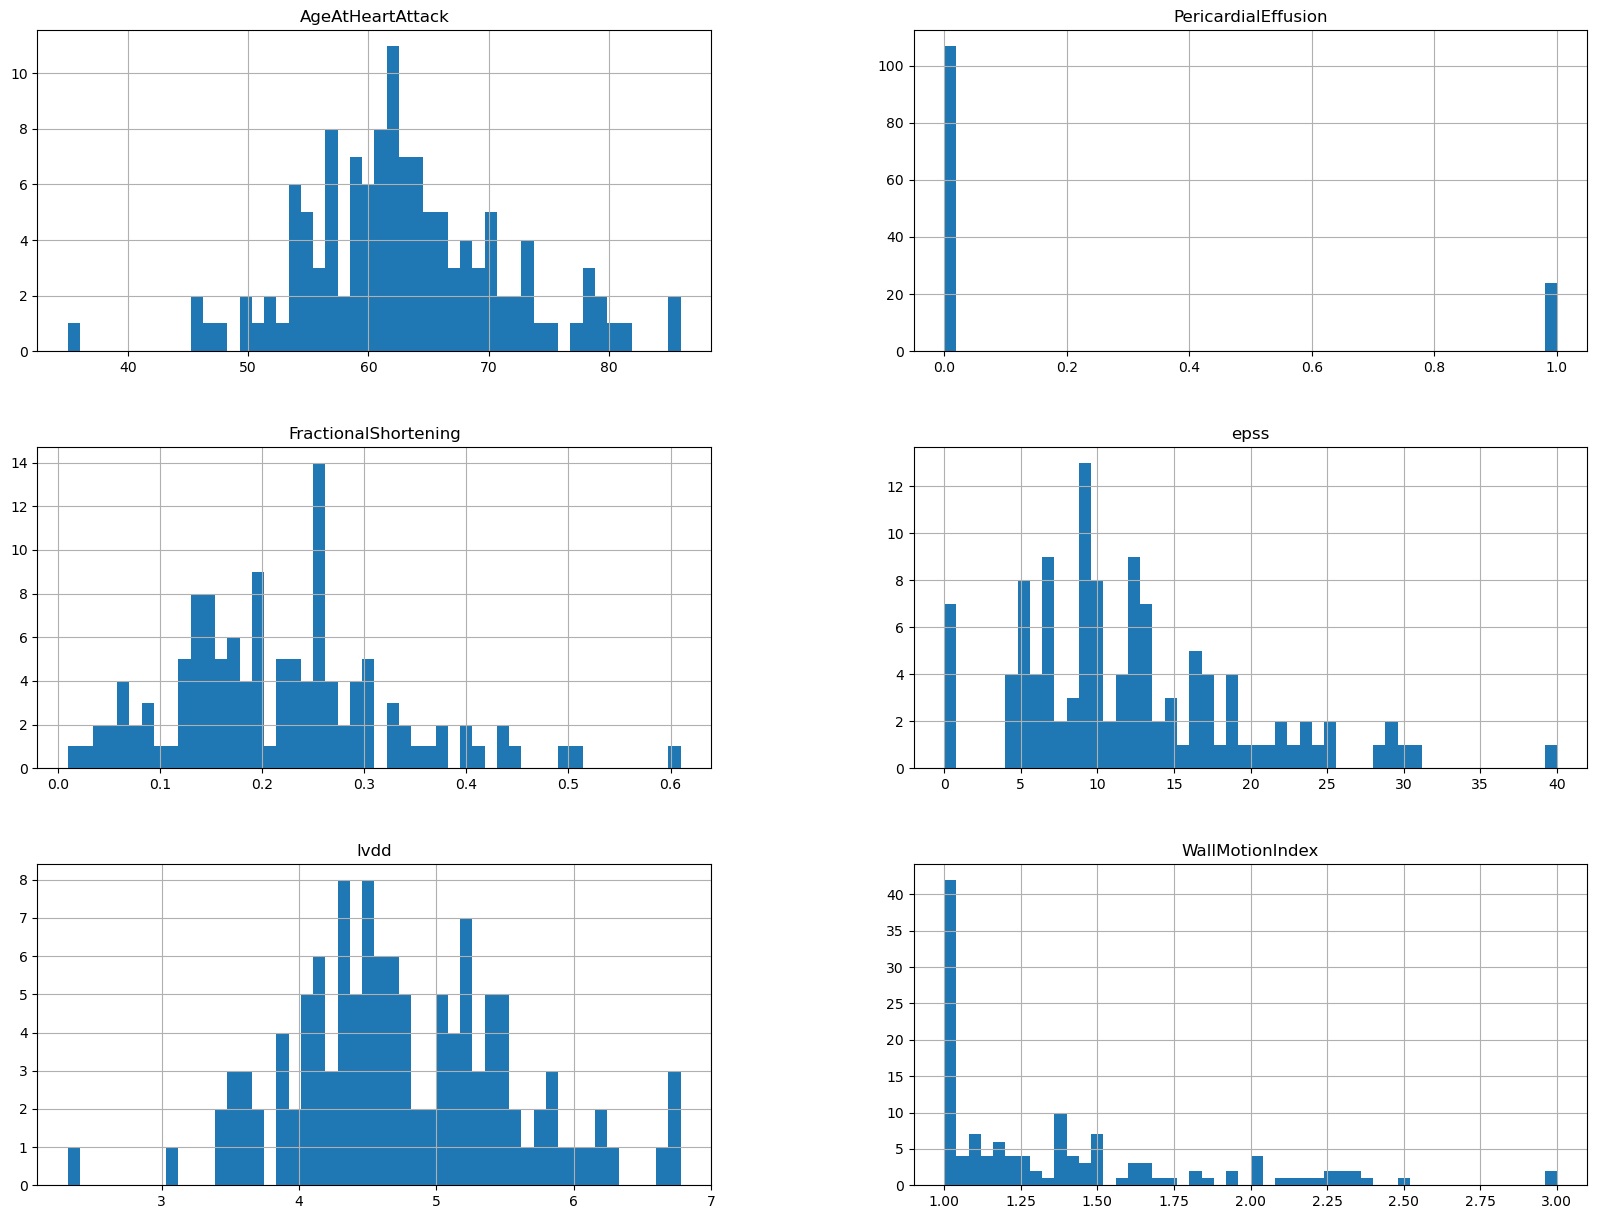

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

heart_attack_data.hist(bins=50,figsize=(20,15))

There are some outliers in some features: FractionalShortening, epss, and WallMotionIndex. However, these are the medical data which are all important. Hence, we keep all data to train the model. We will handle with null values in the next section (Exercise 8).

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [94]:
# Find cloumns having null values in the training data

index_heart_null = []
for i in range(heart_attack_data.shape[1]):
  if heart_attack_data.iloc[:, i].isnull().any() == True:
    index_heart_null.append(i)
print(index_heart_null)

[0, 2, 3, 4, 5]


In [95]:
heart_attack_data.head()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.00
1,72.0,0,0.380,6.000,4.100,1.70
2,55.0,0,0.260,4.000,3.420,1.00
3,60.0,0,0.253,12.062,4.603,1.45
4,57.0,0,0.160,22.000,5.750,2.25


In [96]:
print(heart_attack_data.columns[index_heart_null])

Index(['AgeAtHeartAttack', 'FractionalShortening', 'epss', 'lvdd',
       'WallMotionIndex'],
      dtype='object')


Since the features that contain null values (NaN) are AgeAtHeartAttack, FractionalShortening, epss, lvdd, and WallMotionIndex, which are not binary, it would be more sensible to replace the null values by the mean value of the corresponding column.

In [97]:
heart_attack_data.describe()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
count,126.000000,131.000000,124.000000,117.000000,121.000000,130.00000
mean,62.813722,0.183206,0.216734,12.164769,4.763157,1.37800
std,8.342110,0.388320,0.107513,7.370159,0.810013,0.45185
min,35.000000,0.000000,0.010000,0.000000,2.320000,1.00000
25%,57.000000,0.000000,0.150000,7.000000,4.230000,1.00000
50%,62.000000,0.000000,0.205000,11.000000,4.650000,1.21600
75%,67.750000,0.000000,0.270000,16.100000,5.300000,1.50750
max,86.000000,1.000000,0.610000,40.000000,6.780000,3.00000


In [98]:
# First, we replace the null values by zeros, and then calculate the mean values. Subsequently, the zeros values will be replaced by the mean values.

# # drop rows containing NaN values

# df_heart_drop = heart_attack_data.dropna()
# df_heart_drop

In [99]:
# # calculate mean value of each column

# stat = df_heart_drop.describe()
# stat

In [100]:
# # get the mean values of the coulumns having null values

# mean_null = list(stat.loc["mean"][index_heart_null])
# mean_null

In [101]:
# replace null values by the mean value of the corresponding column

df_heart_clean = heart_attack_data.fillna(heart_attack_data.iloc[:, index_heart_null].mean())
df_heart_clean

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.000
1,72.0,0,0.380,6.000,4.100,1.700
2,55.0,0,0.260,4.000,3.420,1.000
3,60.0,0,0.253,12.062,4.603,1.450
4,57.0,0,0.160,22.000,5.750,2.250
...,...,...,...,...,...,...
126,64.0,0,0.240,12.900,4.720,1.000
127,64.0,0,0.280,5.400,5.470,1.100
128,69.0,0,0.200,7.000,5.050,1.210
129,57.0,0,0.140,16.100,4.360,1.360


In [102]:
# ## replace NaN values by zeros

# df_heart = heart_attack_data.fillna(0)

In [103]:
# stat = df_heart.describe()
# stat

In [104]:
# mean_null = list(stat.loc["mean"][index_heart_null])
# mean_null

In [105]:
# # Replace null values by the mean value of the corresponding column

# df_heart_clean = heart_attack_data.fillna(heart_attack_data.iloc[:, index_heart_null].mean())
# df_heart_clean

In [106]:
# Find cloumns having null values in the training data

index_df_heart_null = []
for i in range(df_heart_clean.shape[1]):
  if df_heart_clean.iloc[:, i].isnull().any() == True:
    index_df_heart_null.append(i)
print(index_df_heart_null)

[]


Now there is no any null value in the training datase.

In [107]:
df_heart_clean.describe()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,62.813722,0.183206,0.216734,12.164769,4.763157,1.378000
std,8.180112,0.388320,0.104578,6.962003,0.778235,0.450109
min,35.000000,0.000000,0.010000,0.000000,2.320000,1.000000
25%,57.500000,0.000000,0.150000,7.550000,4.290000,1.000000
50%,62.000000,0.000000,0.216734,12.000000,4.750000,1.222000
75%,67.000000,0.000000,0.265000,14.900000,5.255000,1.505000
max,86.000000,1.000000,0.610000,40.000000,6.780000,3.000000


In [108]:
df_heart_clean.describe().loc["mean"][index_heart_null]

AgeAtHeartAttack        62.813722
FractionalShortening     0.216734
epss                    12.164769
lvdd                     4.763157
WallMotionIndex          1.378000
Name: mean, dtype: float64

Now we have replaced null values by the mean value of the corresponding column. Next we are going to check whether there is any null value in the training data targets.

In [109]:
# Find cloumns having null values in the training data targets

index_heart_targets_null = []
for i in range(heart_attack_targets.shape[1]):
  if heart_attack_targets.iloc[:, i].isnull().any() == True:
    index_heart_targets_null.append(i)
print(index_heart_targets_null)

[]


There is no any null value in the training data targets

In [110]:
heart_attack_targets

,Target-class
0,0
1,0
2,0
3,0
4,0
...,...
126,1
127,0
128,0
129,0


Split the dataset for training and test the model

In [111]:
df_heart_clean["Target-class"] = heart_attack_targets

# Split the dataframe into the training set and test set

from sklearn.model_selection import train_test_split

train_set_heart, test_set_heart = train_test_split(df_heart_clean, test_size= 0.2, random_state=42)

x_train_heart, y_train_heart = train_set_heart.iloc[:, 0:df_heart_clean.shape[1]-1], train_set_heart.iloc[:, -1:]
x_test_heart, y_test_heart = test_set_heart.iloc[:, 0:df_heart_clean.shape[1]-1], test_set_heart.iloc[:, -1:]

In [112]:
x_train_heart

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
78,63.0,0,0.200,5.0,5.20,1.00
47,59.0,0,0.030,21.3,6.29,1.31
0,71.0,0,0.260,9.0,4.60,1.00
12,73.0,0,0.330,6.0,4.00,1.00
42,79.0,0,0.150,17.5,4.27,1.30
...,...,...,...,...,...,...
71,60.0,0,0.120,10.2,4.31,1.67
106,57.0,0,0.036,7.0,4.12,1.23
14,62.0,0,0.120,23.0,5.80,2.33
92,46.0,0,0.272,16.5,5.36,1.06


In [113]:
y_train_heart

,Target-class
78,0
47,0
0,0
12,0
42,0
...,...
71,0
106,0
14,1
92,0


In [114]:
x_test_heart

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
55,63.000000,0,0.150000,13.000000,4.570000,1.080
40,54.000000,0,0.350000,9.300000,3.630000,1.222
19,66.000000,1,0.220000,15.000000,5.400000,2.250
31,52.000000,1,0.170000,17.200000,5.320000,1.170
115,62.813722,0,0.260000,0.000000,4.380000,1.000
56,57.000000,0,0.130000,18.600000,4.370000,1.370
69,86.000000,0,0.225000,12.200000,5.200000,2.180
105,57.000000,0,0.228000,9.700000,4.290000,1.000
81,62.000000,0,0.250000,6.000000,4.480000,1.000
26,35.000000,0,0.300000,5.000000,4.170000,1.000


In [115]:
y_test_heart

,Target-class
55,0
40,0
19,1
31,1
115,0
56,0
69,1
105,0
81,0
26,0


# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

# With L1 and L2 regularisation

In [116]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier with L1 regularization
log_reg1 = LogisticRegression(penalty='l1', solver='saga')
log_reg1.fit(x_train_heart, y_train_heart)

# Create a logistic regression classifier with L2 regularization
log_reg2 = LogisticRegression(penalty='l2', solver='lbfgs')
log_reg2.fit(x_train_heart, y_train_heart)

/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [117]:
pred_log_reg1 = log_reg1.predict(x_test_heart)
pred_log_reg1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

In [118]:
pred_log_reg2 = log_reg2.predict(x_test_heart)
pred_log_reg2

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [119]:
acc_log_reg1 = log_reg1.score(x_test_heart, y_test_heart)
print("Mean accuracy of the logistic regression model with the regularisation l1:", acc_log_reg1)

acc_log_reg2 = log_reg2.score(x_test_heart, y_test_heart)
print("Mean accuracy of the logistic regression model with the regularisation l2:", acc_log_reg2)

Mean accuracy of the logistic regression model with the regularisation l1: 0.6666666666666666
Mean accuracy of the logistic regression model with the regularisation l2: 0.8148148148148148


In [120]:
log_reg1_coef, log_reg1_bias = log_reg1.coef_, log_reg1.intercept_
print("Logistic Regression with l1's coefficients:")
print(log_reg1_coef)
print(log_reg1_bias)

log_reg2_coef, log_reg2_bias = log_reg2.coef_, log_reg2.intercept_
print("Logistic Regression with l2's coefficients:")
print(log_reg2_coef)
print(log_reg2_bias)

Logistic Regression with l1's coefficients:
[[-0.02080458  0.05790139 -0.00648483  0.07934157 -0.10295004  0.06266833]]
[-0.04255816]
Logistic Regression with l2's coefficients:
[[ 0.07160125  0.78213164 -0.50858214  0.07316052 -0.12507194  1.17240108]]
[-7.45989539]


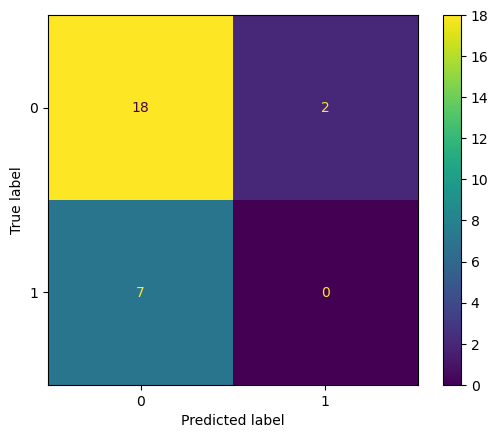

In [121]:
# Create the confusion matrix for l1

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm_log_reg1 = confusion_matrix(y_test_heart, pred_log_reg1)

ConfusionMatrixDisplay(confusion_matrix = cm_log_reg1).plot()

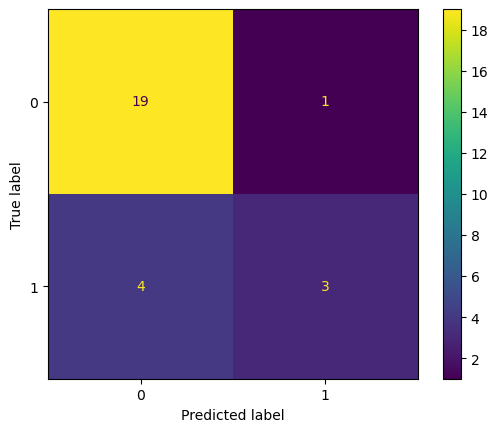

In [122]:
# Create the confusion matrix for l2

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm_log_reg2 = confusion_matrix(y_test_heart, pred_log_reg2)

ConfusionMatrixDisplay(confusion_matrix = cm_log_reg2).plot()

In [123]:
from sklearn.metrics import f1_score

accuracy_log_reg1 = accuracy_score(y_test_heart, pred_log_reg1)
precision_log_reg1 = precision_score(y_test_heart, pred_log_reg1)
recall_log_reg1 = recall_score(y_test_heart, pred_log_reg1)
f1_score_log_reg1 = f1_score(y_test_heart, pred_log_reg1)

print("Logistic Regression with l1:")
print("Accuracy:", accuracy_log_reg1)
print("Precision:", precision_log_reg1)
print("Recall:", recall_log_reg1)
print("F1 Score:", f1_score_log_reg1)

Logistic Regression with l1:
Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [124]:
from sklearn.metrics import f1_score

accuracy_log_reg2 = accuracy_score(y_test_heart, pred_log_reg2)
precision_log_reg2 = precision_score(y_test_heart, pred_log_reg2)
recall_log_reg2 = recall_score(y_test_heart, pred_log_reg2)
f1_score_log_reg2 = f1_score(y_test_heart, pred_log_reg2)

print("Logistic Regression with l2:")
print("Accuracy:", accuracy_log_reg2)
print("Precision:", precision_log_reg2)
print("Recall:", recall_log_reg2)
print("F1 Score:", f1_score_log_reg2)

Logistic Regression with l2:
Accuracy: 0.8148148148148148
Precision: 0.75
Recall: 0.42857142857142855
F1 Score: 0.5454545454545454


As we can see, the logistic regression with l2 regularisation model perform fairly better than the performance of the logistic regression with l1 regularisation model.

# Without L1 and L2 regularisation

In [125]:
log = LogisticRegression(penalty = None)
log.fit(x_train_heart, y_train_heart)

/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

In [126]:
pred_log = log.predict(x_test_heart)
pred_log

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0])

In [127]:
acc_log = log.score(x_test_heart, y_test_heart)
print("Mean accuracy of the logistic regression model withou the regu;arisation:", acc_log)

Mean accuracy of the logistic regression model withou the regu;arisation: 0.7037037037037037


In [128]:
log_coef, log_bias = log.coef_, log.intercept_
print(log_coef)
print(log_bias)

[[ 0.07717456  1.08034297 -3.47211846  0.06408785 -0.25111576  1.48439624]]
[-7.00020014]


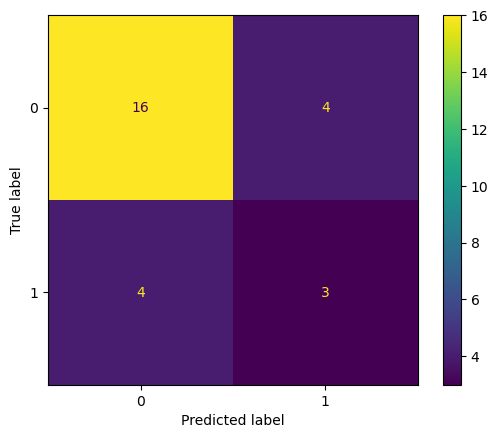

In [129]:
# Create the confusion matrix
cm_log = confusion_matrix(y_test_heart, pred_log)

ConfusionMatrixDisplay(confusion_matrix = cm_log).plot()

In [130]:
accuracy_log = accuracy_score(y_test_heart, pred_log)
precision_log = precision_score(y_test_heart, pred_log)
recall_log = recall_score(y_test_heart, pred_log)
f1_score_log = f1_score(y_test_heart, pred_log)

print("Logistic Regression without Regularisation:")
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_score_log)

Logistic Regression without Regularisation:
Accuracy: 0.7037037037037037
Precision: 0.42857142857142855
Recall: 0.42857142857142855
F1 Score: 0.42857142857142855


Due to the logistic regression with l2 regularisation model being better than the logistic regression with l1 regularisation model, we do not need to compare the logistic regression without regularisation with the l1 one.

In [131]:
if accuracy_log_reg2 > accuracy_log:
  print("Logistic regression with l2 regularisation accuracy is higher")
elif accuracy_log_reg2 < accuracy_log:
  print("Logistic regression without regularisation accuracy is higher")
else:
  print("Both models have equal accuracy")

if precision_log_reg2 > precision_log:
  print("Logistic regression with l2 regularisation precision is higher")
elif precision_log_reg2 < precision_log:
  print("Logistic regression without regularisation precision is higher")
else:
  print("Both models have equal precision")

if recall_log_reg2 > recall_log:
  print("Logistic regression with l2 regularisation recall is higher")
elif recall_log_reg2 < recall_log:
  print("Logistic regression without regularisation recall is higher")
else:
  print("Both models have equal recall")

if f1_score_log_reg2 > f1_score_log:
  print("Logistic regression with l2 regularisation F1 score is higher")
elif f1_score_log_reg2 < f1_score_log:
  print("Logistic regression without regularisation F1 score is higher")
else:
  print("Both models have equal F1 score")

Logistic regression with l2 regularisation accuracy is higher
Logistic regression with l2 regularisation precision is higher
Both models have equal recall
Logistic regression with l2 regularisation F1 score is higher


Since the logistic regression with l2 regularisation has more false negative (predict 0 but the true value is 1), less false positive (predict 1 but the true value is 0), and more accuracy, we prefer adding the l2 regularisation to the model. On top of that, the model with l2 regularisation has more F1 score. Therefore, the best model is the logistic model with l2 regularisation.

In [132]:
# acc_logistic = {"logistic regression with regularisation":acc_log_reg, "logistic regression without regularisation":acc_log}
# best_logistic_model = max(acc_logistic, key = acc_logistic.get)
# print(f"The best logistic regression model is the {best_logistic_model} with accuracy {acc_logistic[best_logistic_model]}")

The logistic regression with l2 regularisation model perform the best performance because the regularisation helps penalise the features that influence much more than the others in order not to let the model be influenced by just some features and ignore the rest. In addition, the regularisation can help avoid overfitting.

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [134]:
forest_class = RandomForestClassifier()
forest_class.fit(x_train_heart, y_train_heart)

/var/folders/_9/4cbg6mnd3fjg8bf_d_k3ksqc0000gn/T/ipykernel_84005/3480720113.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_class.fit(x_train_heart, y_train_heart)


RandomForestClassifier()

In [135]:
pred_forest_class = forest_class.predict(x_test_heart)
pred_forest_class

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0])

In [136]:
acc_forest_class = accuracy_score(y_test_heart, pred_forest_class)
print("Accuracy:", acc_forest_class)

Accuracy: 0.7037037037037037


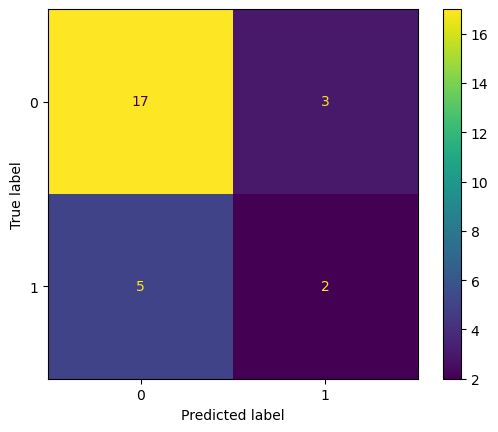

In [137]:
# Create the confusion matrix

cm_forest_class = confusion_matrix(y_test_heart, pred_forest_class)

ConfusionMatrixDisplay(confusion_matrix = cm_forest_class).plot()

In [138]:
accuracy_forest_class = accuracy_score(y_test_heart, pred_forest_class)
precision_forest_class = precision_score(y_test_heart, pred_forest_class)
recall_forest_class = recall_score(y_test_heart, pred_forest_class)
f1_score_forest_class = f1_score(y_test_heart, pred_forest_class)

print("Accuracy:", accuracy_forest_class)
print("Precision:", precision_forest_class)
print("Recall:", recall_forest_class)
print("F1 Score:", f1_score_forest_class)

Accuracy: 0.7037037037037037
Precision: 0.4
Recall: 0.2857142857142857
F1 Score: 0.3333333333333333


In [139]:
if accuracy_log_reg2 > accuracy_forest_class:
  print("Accuracy: Logistic regression with l2 regularisation")
elif accuracy_log_reg2 < accuracy_forest_class:
  print("Accuracy: Random Forest Classifier")
else:
  print("Both models have equal accuracy")

if precision_log_reg2 > precision_forest_class:
  print("Precision: Logistic regression with l2 regularisation")
elif precision_log_reg2 < precision_forest_class:
  print("Precision: Random Forest Classifier")
else:
  print("Both models have equal precision")

if recall_log_reg2 > recall_forest_class:
  print("Recall: Logistic regression with l2 regularisation")
elif recall_log_reg2 < recall_forest_class:
  print("Recall: Random Forest Classifier")
else:
  print("Both models have equal recall")

if f1_score_log_reg2 > f1_score_forest_class:
  print("F1 Score: Logistic regression with l2 regularisation")
elif f1_score_log_reg2 < f1_score_forest_class:
  print("F1 Score: Random Forest Classifier")
else:
  print("Both models have equal F1 score")

Accuracy: Logistic regression with l2 regularisation
Precision: Logistic regression with l2 regularisation
Recall: Logistic regression with l2 regularisation
F1 Score: Logistic regression with l2 regularisation


Although the random forest classifier has less recall, it has less accuracy and less precision compared with the logistic regression with l2 regularisation model. Moreover, the random forest classifier has less F1 score than that of the logistic regression with l2 regularisation model. Therefore, we still prefer the logistic regression with l2 regularisation model to predict the heart attack.

Let's try 10-fold cross validation

In [140]:
cv_forest_class = RandomForestClassifier()
cv_forest_class.fit(x_train_heart, y_train_heart)

# Perform 10-fold cross-validation on the training data
scores = cross_val_score(cv_forest_class, x_train_heart, y_train_heart, cv=10)

# Calculate the mean and standard deviation of the cross-validation scores
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Make predictions on the testing data
pred_cv_forest_class = cv_forest_class.predict(x_test_heart)

# Evaluate the performance of the model using various metrics
print("Accuracy: %.2f" % accuracy_score(y_test_heart, pred_cv_forest_class))
print("Precision: %.2f" % precision_score(y_test_heart, pred_cv_forest_class))
print("Recall: %.2f" % recall_score(y_test_heart, pred_cv_forest_class))
print("F1-score: %.2f" % f1_score(y_test_heart, pred_cv_forest_class))

/var/folders/_9/4cbg6mnd3fjg8bf_d_k3ksqc0000gn/T/ipykernel_84005/3904351113.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cv_forest_class.fit(x_train_heart, y_train_heart)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/benz_tanakij/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:6

Cross-validation accuracy: 0.72 (+/- 0.29)
Accuracy: 0.70
Precision: 0.40
Recall: 0.29
F1-score: 0.33


This implies that the performance of the random forest model when applying 10-fold cross validation drops considerably. Hence, , the model that perform the best predicting the heart attack is the logistic regression with l2 regularisation model.

Next, report the top five most important/relevant features identified using the Random Forest model.

In [141]:
forest_class_coef = forest_class.feature_importances_
forest_class_coef = list(forest_class_coef)
forest_class_coef

[0.12553565402293,
 0.03192250058787439,
 0.16615594350973903,
 0.20564453718347586,
 0.22802409960465325,
 0.24271726509132752]

In [142]:
# Add row "coef" to the dataset

df_forest_class = heart_attack_data
df_forest_class.loc["coef"] = forest_class_coef
df_forest_class

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.000000,0.000000,0.260000,9.000000,4.600000,1.000000
1,72.000000,0.000000,0.380000,6.000000,4.100000,1.700000
2,55.000000,0.000000,0.260000,4.000000,3.420000,1.000000
3,60.000000,0.000000,0.253000,12.062000,4.603000,1.450000
4,57.000000,0.000000,0.160000,22.000000,5.750000,2.250000
...,...,...,...,...,...,...
127,64.000000,0.000000,0.280000,5.400000,5.470000,1.100000
128,69.000000,0.000000,0.200000,7.000000,5.050000,1.210000
129,57.000000,0.000000,0.140000,16.100000,4.360000,1.360000
130,62.000000,0.000000,0.150000,0.000000,4.510000,1.409000


In [143]:
# Sort the columns by the correlations

df_forest_class_sort = df_forest_class.sort_values(by = "coef", axis = 1, ascending = False)
df_forest_class_sort

,WallMotionIndex,lvdd,epss,FractionalShortening,AgeAtHeartAttack,PericardialEffusion
0,1.000000,4.600000,9.000000,0.260000,71.000000,0.000000
1,1.700000,4.100000,6.000000,0.380000,72.000000,0.000000
2,1.000000,3.420000,4.000000,0.260000,55.000000,0.000000
3,1.450000,4.603000,12.062000,0.253000,60.000000,0.000000
4,2.250000,5.750000,22.000000,0.160000,57.000000,0.000000
...,...,...,...,...,...,...
127,1.100000,5.470000,5.400000,0.280000,64.000000,0.000000
128,1.210000,5.050000,7.000000,0.200000,69.000000,0.000000
129,1.360000,4.360000,16.100000,0.140000,57.000000,0.000000
130,1.409000,4.510000,0.000000,0.150000,62.000000,0.000000


In [144]:
df_forest_class_sort = df_forest_class_sort.drop(index = "coef")
df_forest_class_sort

,WallMotionIndex,lvdd,epss,FractionalShortening,AgeAtHeartAttack,PericardialEffusion
0,1.000,4.600,9.000,0.260,71.0,0.0
1,1.700,4.100,6.000,0.380,72.0,0.0
2,1.000,3.420,4.000,0.260,55.0,0.0
3,1.450,4.603,12.062,0.253,60.0,0.0
4,2.250,5.750,22.000,0.160,57.0,0.0
...,...,...,...,...,...,...
126,1.000,4.720,12.900,0.240,64.0,0.0
127,1.100,5.470,5.400,0.280,64.0,0.0
128,1.210,5.050,7.000,0.200,69.0,0.0
129,1.360,4.360,16.100,0.140,57.0,0.0


In [145]:
top_five_forest_class = list(df_forest_class_sort.columns)[0:5]
print(f"The top five most important/relevant features identified based on the Random Forest Classifier model are {top_five_forest_class}")

The top five most important/relevant features identified based on the Random Forest Classifier model are ['WallMotionIndex', 'lvdd', 'epss', 'FractionalShortening', 'AgeAtHeartAttack']


Therefore, the top five most important/relevant features identified (from the most important feature to the fifth most important feature) based on the Random Forest Classifier model are **WallMotionIndex, lvdd, epss, FractionalShortening, and AgeAtHeartAttack**.

In [158]:
import tarfile
from IPython.display import FileLink

# Create a new .tar file
with tarfile.open('mm22tj_coursework.tar', 'w') as tar:
    # Add a file to the .tar file
    tar.add('./COMP5611M_Coursework_Assessment.ipynb')
    # Add a directory and its contents to the .tar file
    tar.add('./Data-for-students-regression/')
    tar.add('./Data-for-students-classification/')

# Create a download link for the .tar file
display(FileLink('mm22tj_coursework.tar'))

/Users/benz_tanakij/Downloads/Machine Learning/Coursework/mm22tj_coursework.tar